# Demonstration: VQE algorithm

In [1]:
import pennylane as qml
from pennylane import numpy as np
import jax
import jax.numpy as jnp
from jax import jit
from functools import partial

from matplotlib import pyplot as plt

import copy
import tqdm  # Pretty progress bars
import joblib  # Writing and loading
from noisyopt import minimizeSPSA

import multiprocessing

import sys
sys.path.insert(0, '../')
import vqe as vqe

##############

In [2]:
# System parameters
N = 8
J = 1
l_steps = 100

# Learning parameters
lr = 0.01
epochs = 250

+--- CIRCUIT ---+
0: ──RY(0.00)──RX(8.00)───||─╭C────────────────────||──RY(16.00)──RX(24.00)──||─╭C──────────────────
1: ──RY(1.00)──RX(9.00)───||─╰X─╭C─────────────────||──RY(17.00)──RX(25.00)──||─╰X─╭C───────────────
2: ──RY(2.00)──RX(10.00)──||────╰X─╭C──────────────||──RY(18.00)──RX(26.00)──||────╰X─╭C────────────
3: ──RY(3.00)──RX(11.00)──||───────╰X─╭C───────────||──RY(19.00)──RX(27.00)──||───────╰X─╭C─────────
4: ──RY(4.00)──RX(12.00)──||──────────╰X─╭C────────||──RY(20.00)──RX(28.00)──||──────────╰X─╭C──────
5: ──RY(5.00)──RX(13.00)──||─────────────╰X─╭C─────||──RY(21.00)──RX(29.00)──||─────────────╰X─╭C───
6: ──RY(6.00)──RX(14.00)──||────────────────╰X─╭C──||──RY(22.00)──RX(30.00)──||────────────────╰X─╭C
7: ──RY(7.00)──RX(15.00)──||───────────────────╰X──||──RY(23.00)──RX(31.00)──||───────────────────╰X

───||──RY(32.00)─┤  State
───||──RY(33.00)─┤  State
───||──RY(34.00)─┤  State
───||──RY(35.00)─┤  State
───||──RY(36.00)─┤  State
───||──RY(37.00)─┤  State
───||──RY(38.00)─

99/100: : 100it [00:51,  1.94it/s]


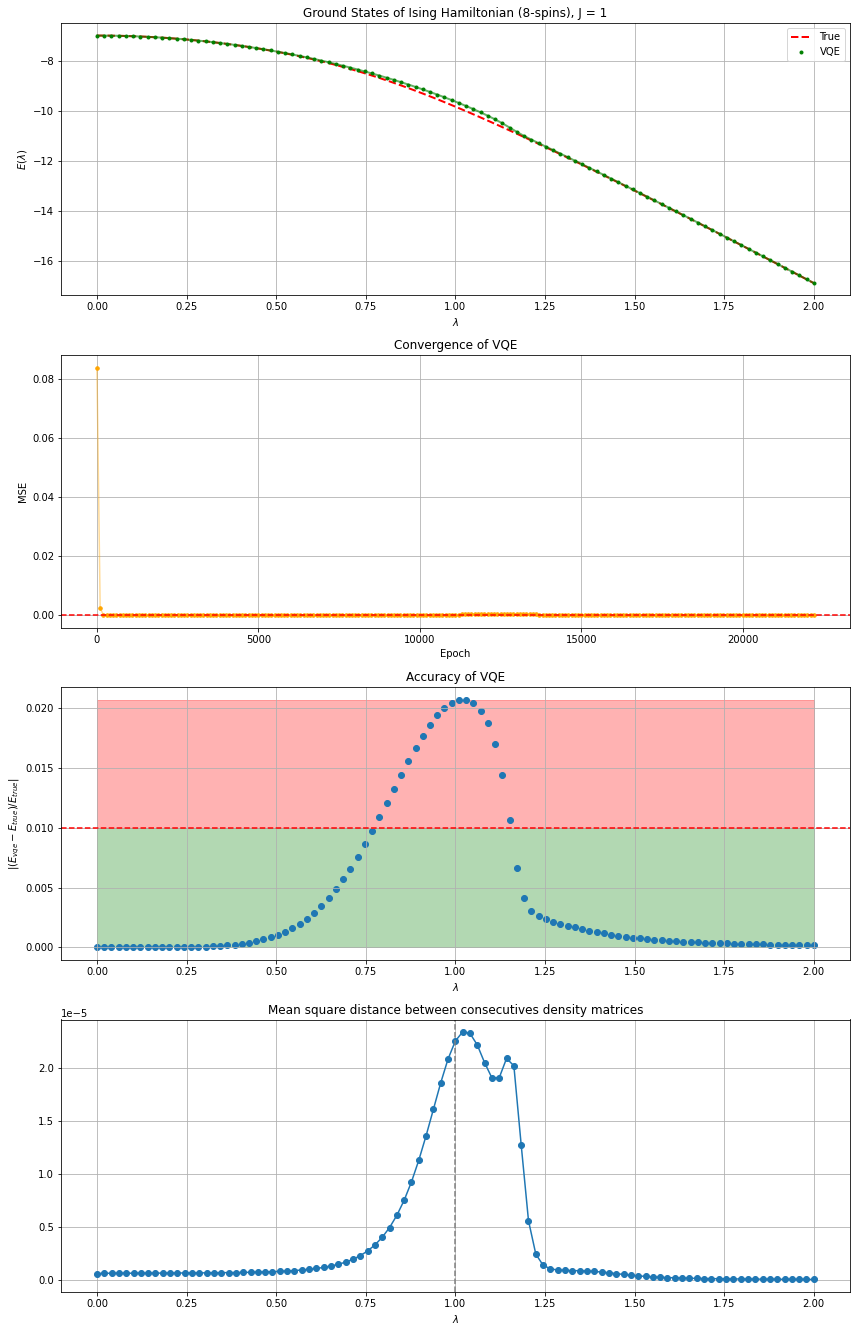

In [11]:
vqe_e, params, ys = vqe.vqe_train(lr, epochs, N, J, l_steps, vqe.vqe_circuit,
                                  circuit=True, plots=True, recycle=True)

In [13]:
vqe_data_x = params 
vqe_data_y = ys
    
vqe_data = []
for i in range(len(vqe_data_x)):
    vqe_data.append((vqe_data_x[i],vqe_data_y[i]))
    
vqe_data = np.array(vqe_data)

joblib.dump(vqe_data, '../data/vqeN'+str(N)+'.job')

['../data/vqeN8.job']

In [9]:
# Learning parameters
lr = 0.5
epochs = 50000
reg = 100

+--- CIRCUIT ---+
0: ──RY(0.00)──RX(8.00)───||─╭C────────────────────||──RY(16.00)──RX(24.00)──||─╭C──────────────────
1: ──RY(1.00)──RX(9.00)───||─╰X─╭C─────────────────||──RY(17.00)──RX(25.00)──||─╰X─╭C───────────────
2: ──RY(2.00)──RX(10.00)──||────╰X─╭C──────────────||──RY(18.00)──RX(26.00)──||────╰X─╭C────────────
3: ──RY(3.00)──RX(11.00)──||───────╰X─╭C───────────||──RY(19.00)──RX(27.00)──||───────╰X─╭C─────────
4: ──RY(4.00)──RX(12.00)──||──────────╰X─╭C────────||──RY(20.00)──RX(28.00)──||──────────╰X─╭C──────
5: ──RY(5.00)──RX(13.00)──||─────────────╰X─╭C─────||──RY(21.00)──RX(29.00)──||─────────────╰X─╭C───
6: ──RY(6.00)──RX(14.00)──||────────────────╰X─╭C──||──RY(22.00)──RX(30.00)──||────────────────╰X─╭C
7: ──RY(7.00)──RX(15.00)──||───────────────────╰X──||──RY(23.00)──RX(31.00)──||───────────────────╰X

───||──RY(32.00)─┤  State
───||──RY(33.00)─┤  State
───||──RY(34.00)─┤  State
───||──RY(35.00)─┤  State
───||──RY(36.00)─┤  State
───||──RY(37.00)─┤  State
───||──RY(38.00)─

Cost: 0.002041465835645795: 100%|██████████████████████| 50000/50000 [01:45<00:00, 471.91it/s]


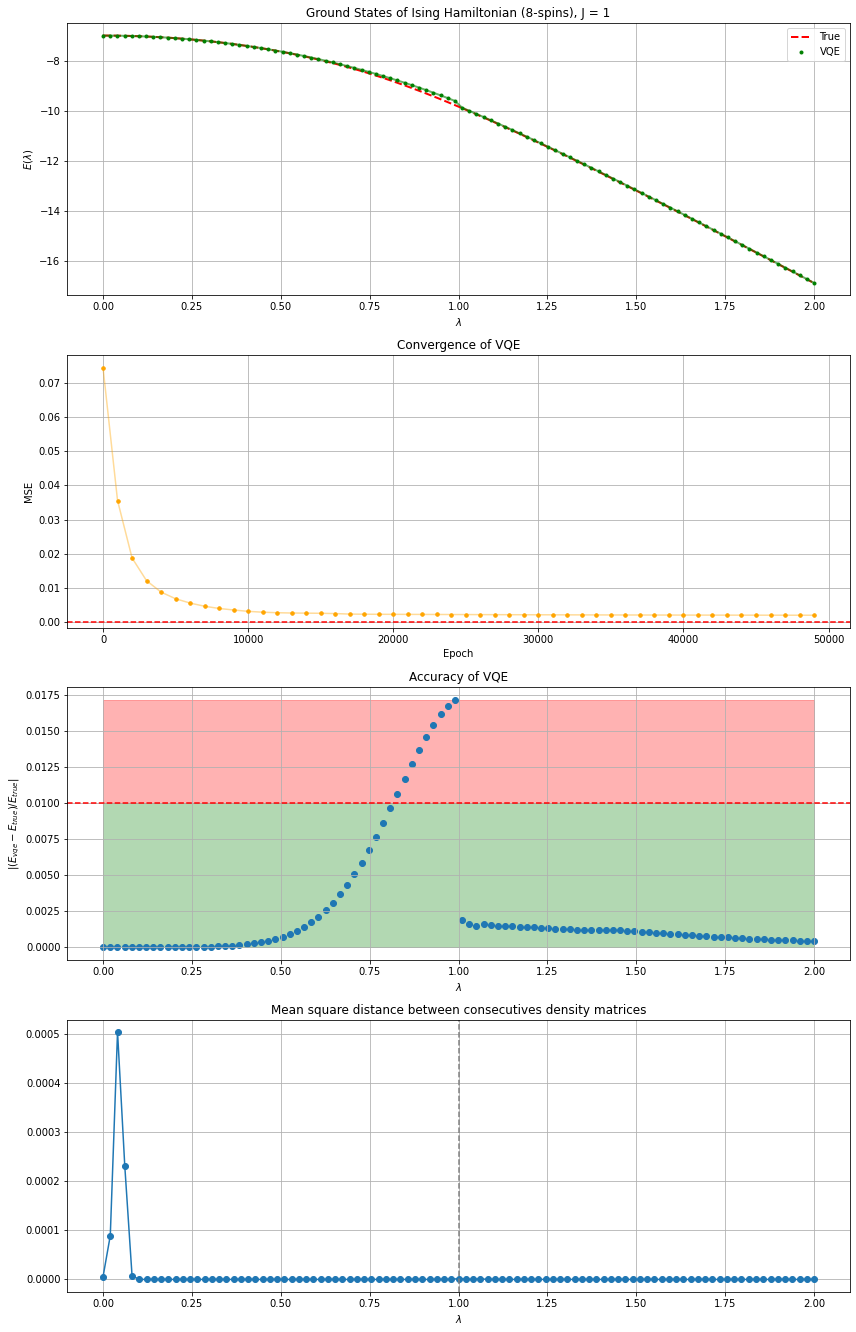

In [10]:
vqe_e, params, ys = vqe.vqe_train(lr, epochs, N, J, l_steps, vqe.vqe_circuit, reg = reg,
                                  circuit=True, plots=True, recycle=False)

In [11]:
vqe_data_x = params 
vqe_data_y = ys
    
vqe_data = []
for i in range(len(vqe_data_x)):
    vqe_data.append((vqe_data_x[i],vqe_data_y[i]))
    
vqe_data = np.array(vqe_data)

joblib.dump(vqe_data, '../data/vqeN'+str(N)+'notrecycle.job')

/home/saverio/Desktop/CERN/code/qua/lib/python3.10/site-packages/autograd/numpy/numpy_wrapper.py:77: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return _np.array(args, *array_args, **array_kwargs)


['../data/vqeN8notrecycle.job']